<a href="https://colab.research.google.com/github/SaurabhVora/Real-World-Project-Using-LSTM-and-Random-Forest/blob/main/Bus_Station_Using_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# (2) Load And Processing a Dataset

In [6]:
data = pd.read_csv('civil_court1.csv')
data.head()

,Date_Time,Sid,Did,Station_Pair,Is_Holiday,Holiday_Type,OneHourSlot,Month,Year,Weekday,Passenger_Count
0,01-06-2018 01:00,5,8,Civil/Court-Thane Station West,0,0,2,6,2018,4,0
1,01-06-2018 02:00,5,8,Civil/Court-Thane Station West,0,0,3,6,2018,4,0
2,01-06-2018 03:00,5,8,Civil/Court-Thane Station West,0,0,4,6,2018,4,0
3,01-06-2018 04:00,5,8,Civil/Court-Thane Station West,0,0,5,6,2018,4,0
4,01-06-2018 05:00,5,8,Civil/Court-Thane Station West,0,0,6,6,2018,4,0


In [5]:
data.shape , data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51623 entries, 0 to 51622
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_Time        51623 non-null  object
 1   Sid              51623 non-null  int64 
 2   Did              51623 non-null  int64 
 3   Station_Pair     51623 non-null  object
 4   Is_Holiday       51623 non-null  int64 
 5   Holiday_Type     51623 non-null  int64 
 6   OneHourSlot      51623 non-null  int64 
 7   Month            51623 non-null  int64 
 8   Year             51623 non-null  int64 
 9   Weekday          51623 non-null  int64 
 10  Passenger_Count  51623 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 4.3+ MB


((51623, 11), None)

In [7]:
# Convert Date_Time to datetime format
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d-%m-%Y %H:%M')

In [8]:
# Drop columns that are not needed or redundant
data = data.drop(['Date_Time', 'Station_Pair'], axis=1)

In [9]:
# Define feature matrix X and target vector y
X = data.drop('Passenger_Count', axis=1)
y = data['Passenger_Count']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (3) Standardize the feature variables

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Show the shapes of the processed datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41298, 8), (10325, 8), (41298,), (10325,))

# (4) Train a Random Forest regressor

In [13]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

In [15]:
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error:", rf_mae)
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("The Accuracy of the model is {}%".format(round(rf_r2 ,2)*100))

Mean Absolute Error: 2.3947187985433986
Mean Squared Error: 17.674190921726648
R-squared: 0.8033278929018172
The Accuracy of the model is 80.0%


# (5) Visualization

Text(0.5, 1.0, 'Random Forest: True vs Predicted Passenger Count')

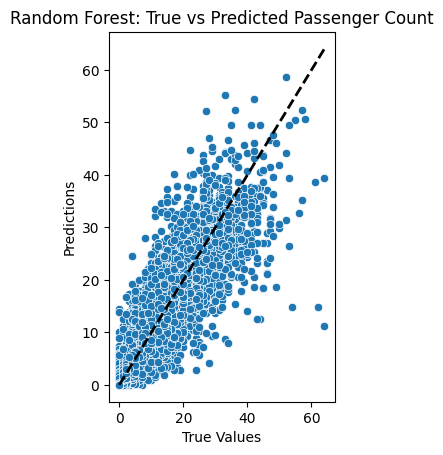

In [16]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest: True vs Predicted Passenger Count')